In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import load_data
#from src.plotting import plot_categorical_distributions,plot_numerical_distributions,plot_month_hour_distribution

In [2]:
X,y=load_data()
X['Year'] = pd.to_datetime(X['Date'], format='%d/%m/%Y', dayfirst=True).dt.year
X['Month'] = pd.to_datetime(X['Date'], format='%d/%m/%Y', dayfirst=True).dt.month
X['Day'] = pd.to_datetime(X['Date'], format='%d/%m/%Y', dayfirst=True).dt.day
df = X
df['Rented Bike Count']=y

Metadata:
{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike avail

In [3]:
# Group by Date and count unique values for Holiday and Functioning Day
unique_counts = X.groupby('Date')[['Holiday', 'Functioning Day']].nunique()

# Filter dates where there are more than 1 unique value in either column
inconsistent_dates = unique_counts[(unique_counts['Holiday'] > 1) | (unique_counts['Functioning Day'] > 1)]

print("Inconsistent Dates:")
print(inconsistent_dates)

# Drop rows with inconsistent dates
df = df[~X['Date'].isin(inconsistent_dates.index)]

Inconsistent Dates:
           Holiday  Functioning Day
Date                               
6/10/2018        1                2


descriptive statistics

In [4]:
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8736 non-null   object 
 1   Hour                   8736 non-null   int64  
 2   Temperature            8736 non-null   float64
 3   Humidity               8736 non-null   int64  
 4   Wind speed             8736 non-null   float64
 5   Visibility             8736 non-null   int64  
 6   Dew point temperature  8736 non-null   float64
 7   Solar Radiation        8736 non-null   float64
 8   Rainfall               8736 non-null   float64
 9   Snowfall               8736 non-null   float64
 10  Seasons                8736 non-null   object 
 11  Holiday                8736 non-null   object 
 12  Functioning Day        8736 non-null   object 
 13  Year                   8736 non-null   int32  
 14  Month                  8736 non-null  

In [5]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date                     0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Year                     0
Month                    0
Day                      0
Rented Bike Count        0
dtype: int64


In [6]:
unique_values = df.nunique()
print("\nUnique Values per Column:")
print(unique_values)


Unique Values per Column:
Date                      364
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
Year                        2
Month                      12
Day                        31
Rented Bike Count        2161
dtype: int64


In [7]:
numerical_stats = df.describe()
print("\nNumerical Columns Descriptive Statistics:")
print(numerical_stats) 


Numerical Columns Descriptive Statistics:
              Hour  Temperature     Humidity   Wind speed   Visibility  \
count  8736.000000  8736.000000  8736.000000  8736.000000  8736.000000   
mean     11.500000    12.868807    58.154991     1.723626  1436.563759   
std       6.922583    11.957874    20.335458     1.035514   608.181004   
min       0.000000   -17.800000     0.000000     0.000000    27.000000   
25%       5.750000     3.400000    42.000000     0.900000   940.000000   
50%      11.500000    13.700000    57.000000     1.500000  1697.000000   
75%      17.250000    22.500000    74.000000     2.300000  2000.000000   
max      23.000000    39.400000    98.000000     7.400000  2000.000000   

       Dew point temperature  Solar Radiation     Rainfall     Snowfall  \
count            8736.000000      8736.000000  8736.000000  8736.000000   
mean                4.043555         0.569889     0.142628     0.075275   
std                13.065416         0.869377     1.111980     0.

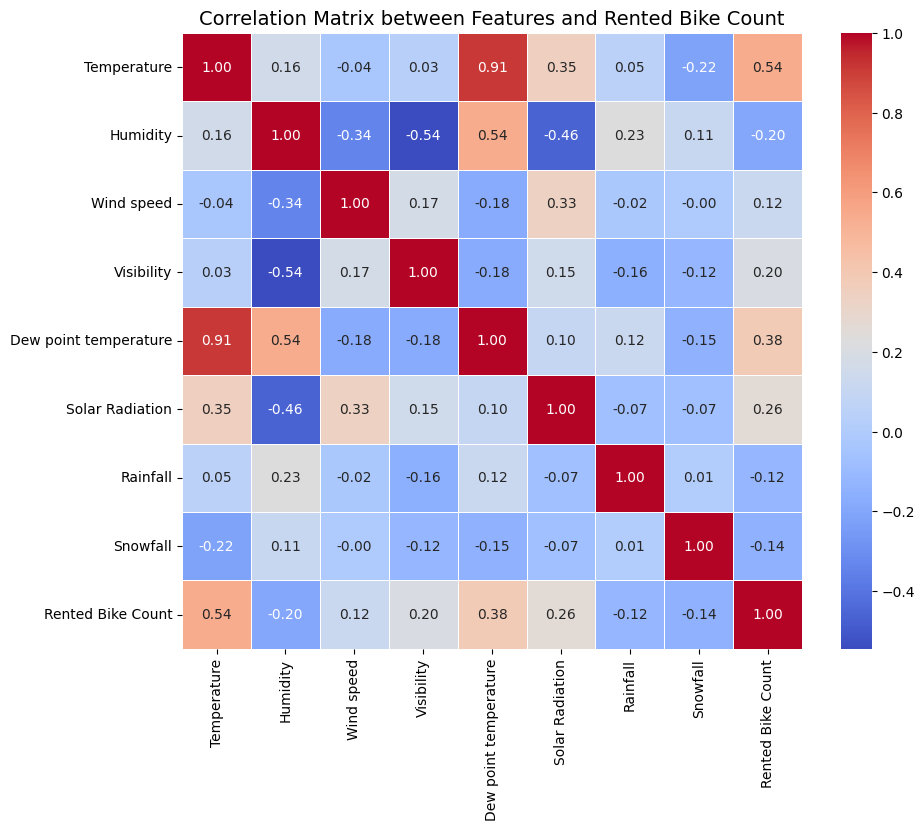

In [8]:
# Selecting variables of interest
variables_of_interest = ['Temperature', 'Humidity', 'Wind speed', 'Visibility',
                         'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
                         'Rented Bike Count']

# Computing correlation matrix
correlation_matrix = df[variables_of_interest].corr()

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Features and Rented Bike Count", fontsize=14)
plt.show()

In [9]:
def plot_numerical_distributions(df, numerical_features):
    """
    Plot distribution charts for numerical features using subplots.

    Parameters:
        df (pd.DataFrame): The data frame containing numerical variables.
        numerical_features (list): A list of column names for the numerical features.
    """
    # Number of numerical features
    num_features = len(numerical_features)
    
    # Define the number of rows and columns for subplots
    cols = 3  # Number of columns in the subplot grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calculate rows needed
    
    # Set up the figure and axis objects
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration
    
    # Plot each numerical feature
    for i, feature in enumerate(numerical_features):
        sns.histplot(df[feature], kde=True, bins=30, ax=axes[i], color='blue', edgecolor='black')
        axes[i].set_title(f"Distribution of {feature}", fontsize=12)
        axes[i].set_xlabel(feature, fontsize=10)
        axes[i].set_ylabel("Frequency", fontsize=10)
    
    # Remove any unused subplots
    for i in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[i])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

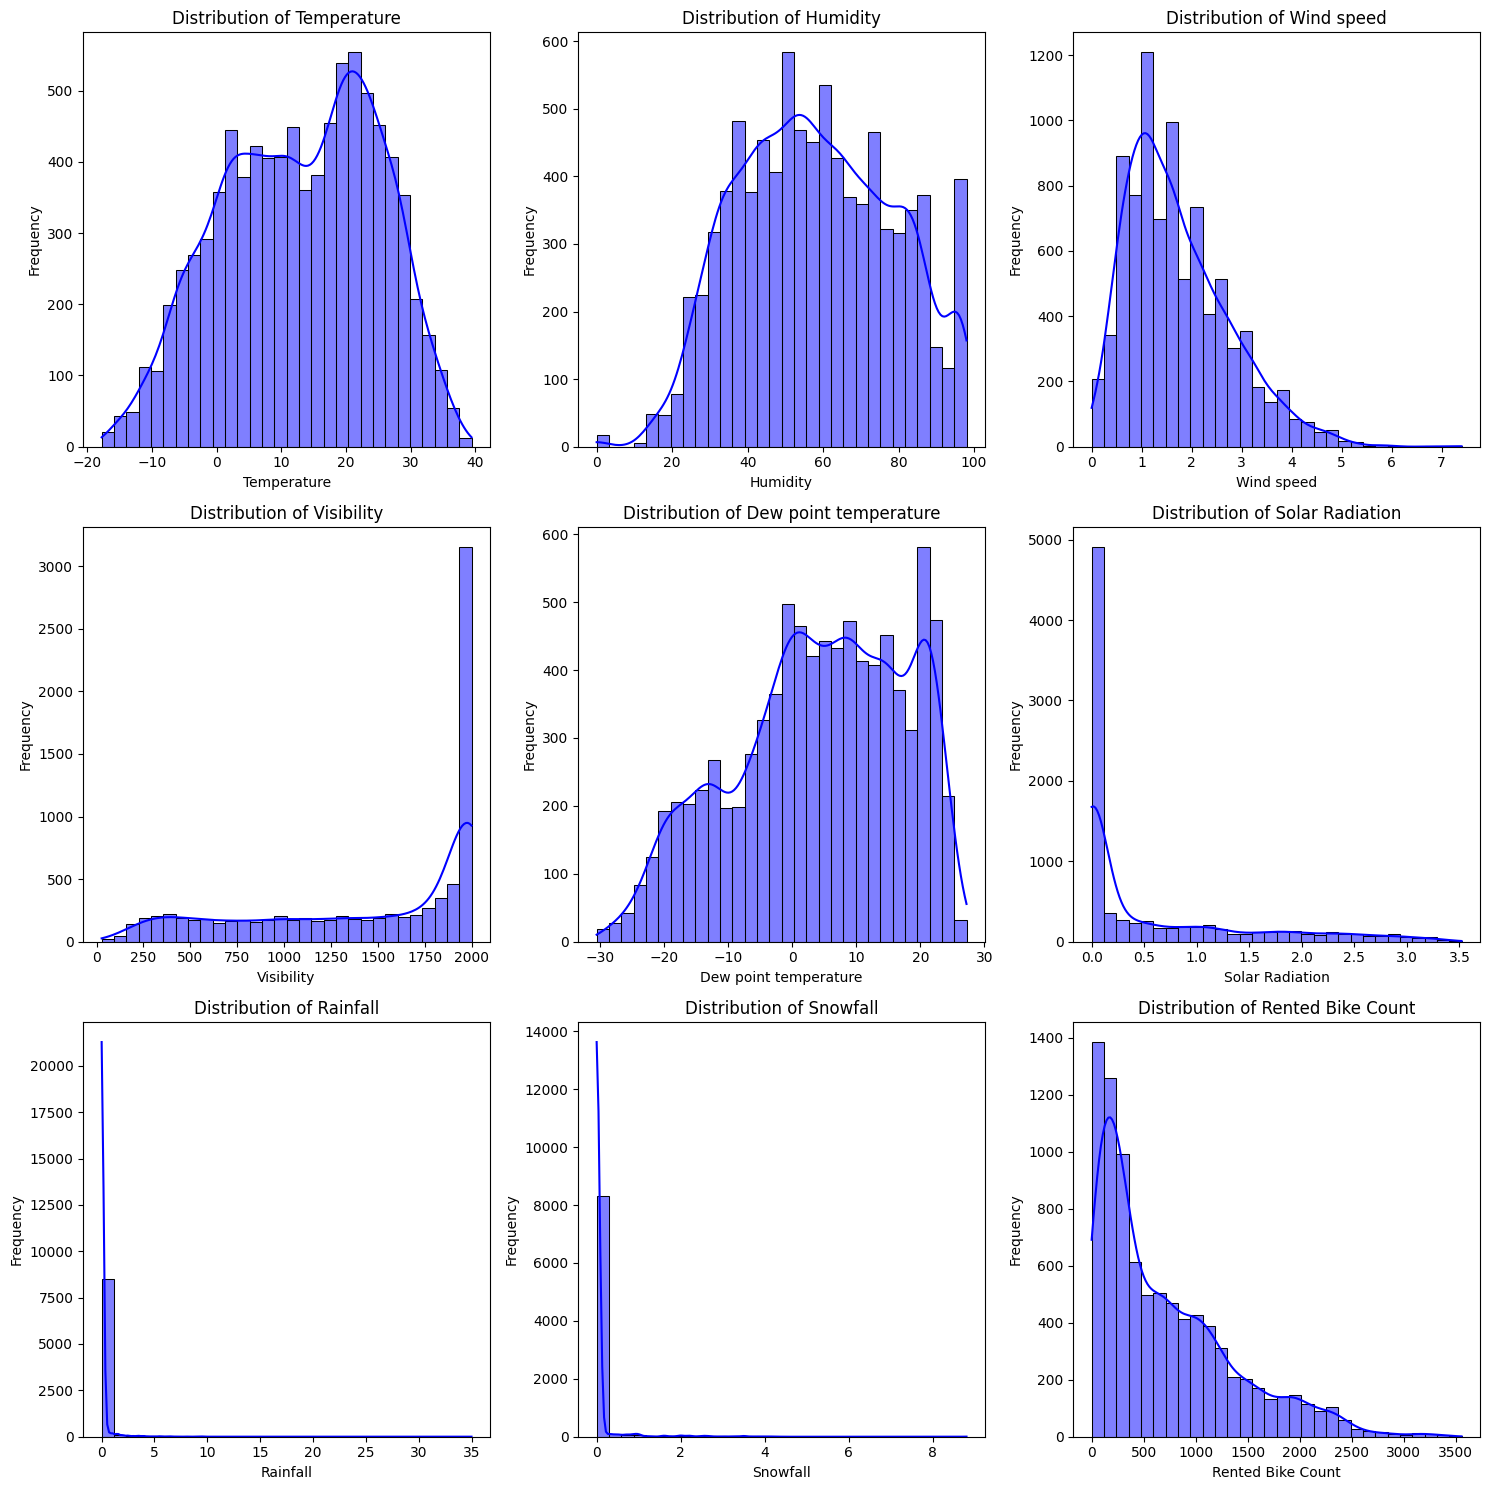

In [11]:

numerical_features = ['Temperature', 'Humidity', 'Wind speed', 'Visibility', 
                      'Dew point temperature', 'Solar Radiation','Rainfall','Snowfall','Rented Bike Count']
plot_numerical_distributions(df,numerical_features)


In [12]:
def plot_month_hour_distribution(data):
    """
    Plot a month-hour distribution scatter plot where:
    - x-axis is the month,
    - y-axis is the hour,
    - point size represents the average rented bike count for each month-hour,
    - point color is determined by the season.

    Parameters:
        data (pd.DataFrame): DataFrame with columns 'Month', 'Hour', and 'Rented Bike Count'.
    """
    # Calculate average rented bike count for each month-hour combination
    grouped_data = data.groupby(['Month', 'Hour'], as_index=False)['Rented Bike Count'].mean()
    grouped_data['Rented Bike Count'] = grouped_data['Rented Bike Count'] / 10

    # Assign colors based on seasons
    def get_season_color(month):
        if month in [12, 1, 2]:
            return 'blue'  # Winter
        elif month in [3, 4, 5]:
            return 'pink'  # Spring
        elif month in [6, 7, 8]:
            return 'red'   # Summer
        elif month in [9, 10, 11]:
            return 'orange'  # Fall

    grouped_data['Color'] = grouped_data['Month'].apply(get_season_color)

    # Plotting
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        grouped_data['Month'],
        grouped_data['Hour'],
        s=grouped_data['Rented Bike Count'] * 10,  # Scale point size
        c=grouped_data['Color'],  # Point color
        alpha=0.7  # Make points slightly transparent
    )

    # Add labels and title
    plt.title("Month-Hour Distribution of Rented Bike Count", fontsize=16)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Hour", fontsize=12)
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.yticks(range(0, 24))  # Hours from 0 to 23
    plt.grid(axis='both', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

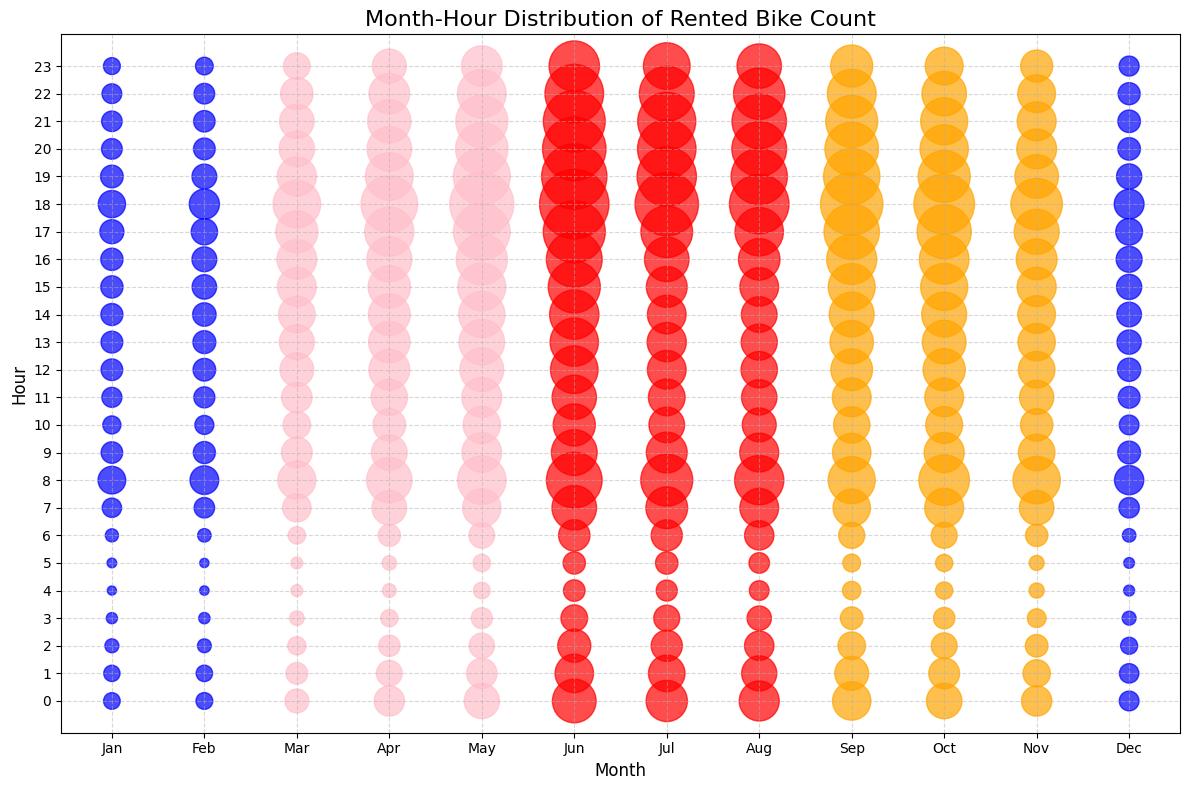

In [13]:
plot_month_hour_distribution(df)

In [14]:
categorical_stats = X.describe(include=['object'])
print("\nCategorical Columns Descriptive Statistics:")
print(categorical_stats)


Categorical Columns Descriptive Statistics:
              Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     30/11/2018  Spring  No Holiday             Yes
freq            24    2208        8328            8465


In [15]:
def plot_categorical_distributions_and_boxplots(df, categorical_features, target_feature):
    """
    Plot subplots for categorical features showing both distribution (countplot) and 
    relationships with a continuous target variable (boxplot).

    Parameters:
        df (pd.DataFrame): DataFrame containing the categorical variables and target variable.
        categorical_features (list): List of column names for the categorical variables.
        target_feature (str): Name of the continuous target feature for the boxplot.
    """
    # Define the number of rows and columns for the subplots
    num_features = len(categorical_features)
    cols = 2  # One column for countplot, one for boxplot
    rows = num_features  # Each row corresponds to one categorical feature
    
    # Create the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    # Plot each categorical feature
    for i, feature in enumerate(categorical_features):
        # Countplot on the left
        sns.countplot(data=df, x=feature, hue=feature ,palette="Set2", ax=axes[i, 0])
        axes[i, 0].set_title(f"Distribution of {feature}", fontsize=12)
        axes[i, 0].set_xlabel(feature, fontsize=10)
        axes[i, 0].set_ylabel("Count", fontsize=10)
        axes[i, 0].tick_params(axis='x', rotation=45)

        # Add count labels on the countplot
        for patch in axes[i, 0].patches:
            height = patch.get_height()  # Get the height of the bar
            if height > 0:
                axes[i, 0].text(
                    patch.get_x() + patch.get_width() / 2,  # x-coordinate
                    height + 0.5,  # y-coordinate (slightly above the bar)
                    f'{int(height)}',  # Text to display (integer count)
                    ha='center', va='center', fontsize=9, color='black'
                )

        # Boxplot on the right
        sns.boxplot(x=feature, y=target_feature,hue=feature , data=df, palette="Set3", ax=axes[i, 1])
        axes[i, 1].set_title(f"{target_feature} by {feature}", fontsize=12)
        axes[i, 1].set_xlabel(feature, fontsize=10)
        axes[i, 1].set_ylabel(target_feature, fontsize=10)

    # Adjust layout
    plt.tight_layout()
    plt.show()


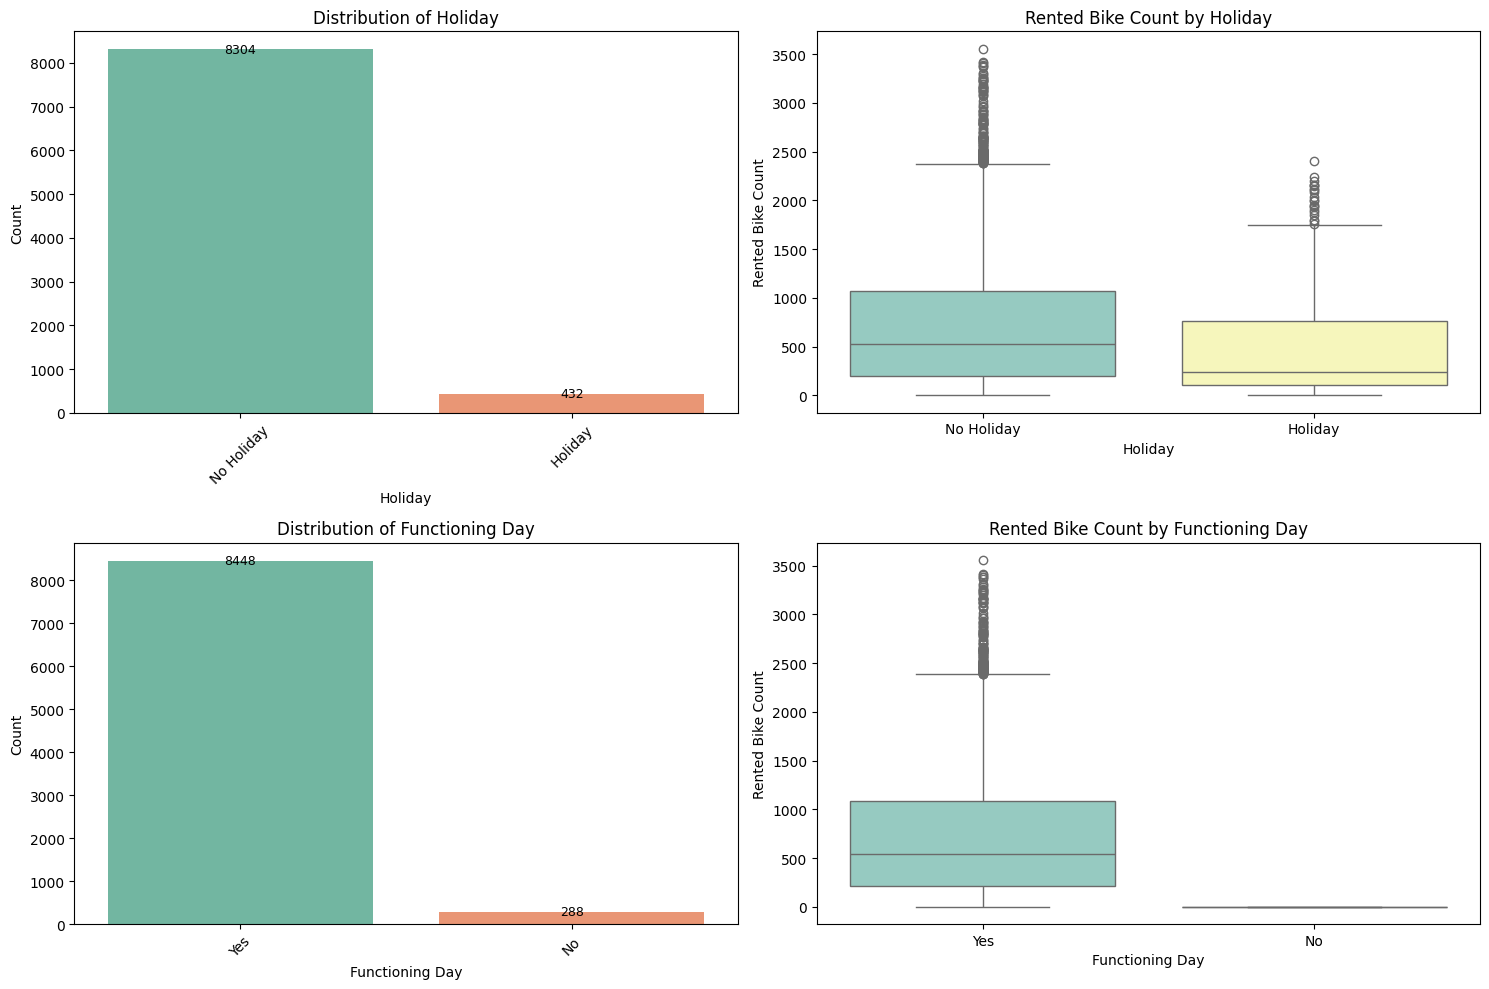

In [16]:
categorical_features = ['Holiday', 'Functioning Day']
plot_categorical_distributions_and_boxplots(df,categorical_features,"Rented Bike Count")